![number theorist](odd-number-theorists.jpg)

Prime numbers are ubiquitous. Prime numbers are fun. Prime numbers have many uses.


But the most important use of prime numners is in art. If you haven't read [prime numbers which look like giraffe](https://www.agiliq.com/blog/2018/01/prime-number-binary-trex/), you should read it, but today we are doing something more fun. Finding prime numbers which look like famous artists.

We will use Salvador Dali, my favorite surrealist,  as the guinea pig.

We will use the below striking image of Dali as our source image.
![Salvador Dali](salvador-dali.jpg)

This is too large (on my machine) to parse as a number, so we will resize it to 24x24 grayscale image. It looks like this

![Salvador Dali](salvador.png)

Much smaller but still recognizable as Salvador. Lets get to work.

In [1]:
# We will read the image as a numpy array.
# Grayscale images are read as numpy array of spape (X, Y)
# Each element is a value between [0, 1]
# We map these to integere between [0, 9], so that each pixel represents a digit

import numpy as np
import matplotlib.image as mpimg
img = mpimg.imread('salvador.png')
quantized_data = np.reshape(
    np.fromiter((round(el*9) for el in img.flatten()), dtype=int), 
    img.shape
)


In [2]:
# Lets look at quantized_data
quantized_data

array([[1, 1, 1, 1, 4, 6, 7, 7, 8, 8, 7, 3, 1, 1, 6, 9, 9, 9, 9],
       [1, 1, 1, 2, 4, 5, 7, 8, 8, 8, 8, 8, 5, 1, 5, 9, 9, 9, 9],
       [1, 1, 1, 2, 3, 5, 7, 8, 8, 8, 8, 8, 8, 6, 3, 9, 9, 9, 9],
       [1, 1, 2, 3, 4, 5, 7, 8, 8, 8, 8, 8, 8, 7, 2, 8, 9, 9, 9],
       [1, 1, 2, 4, 4, 4, 4, 4, 7, 8, 8, 8, 7, 7, 3, 6, 9, 9, 9],
       [1, 1, 3, 4, 2, 2, 3, 4, 2, 4, 7, 8, 7, 6, 2, 4, 9, 9, 9],
       [1, 2, 4, 5, 3, 2, 2, 4, 4, 2, 4, 7, 7, 6, 4, 7, 9, 9, 9],
       [2, 2, 4, 5, 7, 5, 2, 5, 3, 4, 6, 4, 2, 2, 7, 9, 9, 9, 9],
       [2, 1, 2, 4, 7, 8, 5, 5, 7, 7, 7, 1, 2, 2, 7, 9, 9, 9, 9],
       [2, 2, 2, 4, 5, 7, 7, 7, 7, 7, 7, 4, 4, 6, 9, 9, 9, 9, 9],
       [2, 2, 2, 4, 4, 7, 8, 7, 6, 7, 7, 4, 5, 9, 9, 9, 9, 9, 9],
       [2, 2, 2, 4, 5, 5, 7, 4, 5, 7, 7, 4, 7, 9, 9, 9, 9, 9, 9],
       [2, 3, 3, 3, 4, 4, 7, 4, 1, 4, 5, 5, 8, 9, 9, 8, 9, 9, 9],
       [1, 2, 4, 5, 5, 2, 2, 5, 2, 1, 2, 6, 9, 9, 8, 8, 9, 9, 9],
       [1, 2, 3, 5, 5, 4, 2, 2, 3, 1, 4, 8, 8, 8, 9, 9, 9, 9, 9],
       [1,

In [3]:
# We will convert it to integer with each element representing a digit in our number.
# I don't like the code below but it is the best I could come up with
np.set_printoptions(linewidth=10000)
np.set_printoptions(threshold=np.nan)
number = int(np.array2string(quantized_data.flatten())[1:-1].replace(" ", ""))

In [4]:
# Lets look at the number 
number

111146778873116999911124578888851599991112357888888639999112345788888872899911244444788877369991134223424787624999124532244247764799922457525346422799992124785577712279999222457777774469999922244787677459999992224557457747999999233344741455899899912455225212699889991235542231488899999112454442158899999911125643249999999991111256538999999999111112248999999999911147889999999999991149888999999999999114788899999999999911148889888999999991116888888889999999

In [5]:
# We want to find a prime number close to this number
# We will use Miller-rabin fast probilistic testing to check primes
# And keep iterating until we find one

from random import randrange

def find_next_prime(number):
    "Given a number, find next prime number"
    number = number | 1  # ensure last bit is 1
    while(True):
        is_prime = miller_rabin(number)
        if is_prime:
            break
        number += 2
    return number

def miller_rabin(n, k=10):
    if n == 2:
        return True
    if not n & 1:
        return False

    def check(a, s, d, n):
        x = pow(a, d, n)
        if x == 1:
            return True
        for i in range(s - 1):
            if x == n - 1:
                return True
            x = pow(x, 2, n)
        return x == n - 1

    s = 0
    d = n - 1

    while d % 2 == 0:
        d >>= 1
        s += 1

    for i in range(k):
        a = randrange(2, n - 1)
        if not check(a, s, d, n):
            return False
    return True

prime = find_next_prime(number)
prime

111146778873116999911124578888851599991112357888888639999112345788888872899911244444788877369991134223424787624999124532244247764799922457525346422799992124785577712279999222457777774469999922244787677459999992224557457747999999233344741455899899912455225212699889991235542231488899999112454442158899999911125643249999999991111256538999999999111112248999999999911147889999999999991149888999999999999114788899999999999911148889888999999991116888888890000049

In [6]:
# Now reconvert the prime to a gigit 2d array
# Maintain the same size as originally read image
prime_digit_array = np.resize(
    np.array(list(str(prime)), dtype=int), 
    img.shape
)

In [7]:
import seaborn as sns
ax = sns.heatmap(
                prime_digit_array,
                linewidth=0.1, square=True, cmap='gray', annot=False)
ax

Slightly surreal, but still distinctly Salvador Dali.
We have found the prime number 

111146778873116999911124578888851599991112357888888639999112345788888872899911244444788877369991134223424787624999124532244247764799922457525346422799992124785577712279999222457777774469999922244787677459999992224557457747999999233344741455899899912455225212699889991235542231488899999112454442158899999911125643249999999991111256538999999999111112248999999999911147889999999999991149888999999999999114788899999999999911148889888999999991116888888890000049 

Which when plotted in 2d looks like our Favorite Artist.




In [8]:
# If you want to play around with it, 
# Here is a reusabel class you can use to generate the primes and display them.
# It works best with grayscale image with distinctive features.

import numpy as np
from random import randrange
import matplotlib.image as mpimg
import seaborn as sns


class PaintByPrimeNumbers:
    """
    Takes a grayscale image and finds a prime which looks like the target image
    """
    def __init__(self, image_name):
        self.image_name = image_name
        img = mpimg.imread(image_name)
        quantized_data = np.reshape(np.fromiter((round(el*9) for el in img.flatten()), dtype=int), img.shape)
        self.number = self.get_number_from_digitarray(quantized_data)
        self._prime = None
        self.img = img
        
    @property
    def prime(self):
        if self._prime:
            return self._prime
        else:
            self._prime = self.find_next_prime(self.number)
            return self._prime
        
    def display(self, annot=False, cmap="gray"):
        ax = sns.heatmap(
                np.resize(
                    np.array(list(str(self.prime)), dtype=int), 
                    self.img.shape
                ),
                linewidth=0.1, square=True, cmap=cmap, annot=annot)
        
        
    def get_number_from_digitarray(cls, digitarray):
        np.set_printoptions(linewidth=10000)
        np.set_printoptions(threshold=np.nan)
        number = int(np.array2string(digitarray.flatten())[1:-1].replace(" ", ""))
        return number
        
        
    @classmethod
    def find_next_prime(cls, number):
        "Given a number, find next prime number"
        number = number | 1  # ensure last bit is 1
        while(True):
            is_prime = cls.miller_rabin(number)
            if is_prime:
                break
            number += 2
        return number

    @classmethod
    def miller_rabin(cls, n, k=10):
        if n == 2:
            return True
        if not n & 1:
            return False

        def check(a, s, d, n):
            x = pow(a, d, n)
            if x == 1:
                return True
            for i in range(s - 1):
                if x == n - 1:
                    return True
                x = pow(x, 2, n)
            return x == n - 1

        s = 0
        d = n - 1

        while d % 2 == 0:
            d >>= 1
            s += 1

        for i in range(k):
            a = randrange(2, n - 1)
            if not check(a, s, d, n):
                return False
        return True
        

In [9]:
# And lets use our class
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
salvador_dali = PaintByPrimeNumbers('./salvador.png')

Populating the interactive namespace from numpy and matplotlib


/Users/shabda/.virtualenvs/yanny_vs_laurel/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


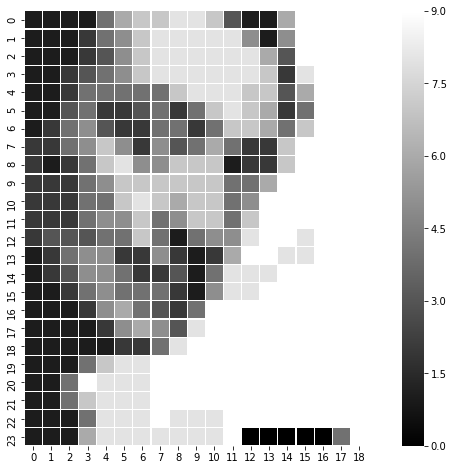

In [10]:
salvador_dali.display()

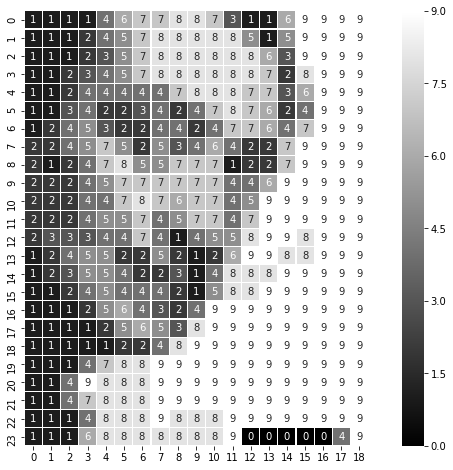

In [11]:
# And lets see with the numbers inline
salvador_dali.display(annot=True)